In [9]:
import sys
sys.path.append('../')  # Add the parent directory to the sys.path
from appartment_hunter import boxplot_whiskers, boxplot_whiskers_iterative_outliers_removal, boxplot_categories
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
label_encoder = LabelEncoder()
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
df = pd.read_csv('../dataset_machine_learning.csv')
df['date'] = pd.to_datetime(df['date'])

In [11]:
df = df[(df['price'] >= boxplot_whiskers(df['price'])[0]) & (df['price'] <= boxplot_whiskers(df['price'])[1])]

In [12]:
city_median_prices = df.groupby('city')['price'].median().sort_values()
sorted_cities = city_median_prices.index.tolist()
city_codes = {city: i for i, city in enumerate(sorted_cities)}
df['city_encoded'] = df['city'].map(city_codes)

In [13]:
df['waterfront_encoded'] = label_encoder.fit_transform(df['waterfront'])

#### K-NN Regression

K-Nearest Neighbors Regression "does not care about the relationship between the predictor x the response variable y. It takes k nearest neighbors and computes the average of those values." [KNN Regression with Python](https://aamir07.medium.com/knn-regression-with-python-c11cbc5aa9a8)

In [14]:
x = df[['sqm_living', 'city_encoded', 'grade', 'waterfront_encoded', 'view', 'yr_built', 'zipcode', 'renovated']].values # predictors 
y = df['price'].values #response or output variable

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=42)

'''fig,ax = plt.subplots(figsize=(10,4))'''
k_list = np.arange(1,80,1)
knn_dict = {} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(x_train,y_train)
    y_knn_pred = model_knn.predict(x_test)
#Storing MSE 
    mse = mean_squared_error(y_test,y_knn_pred)
    rmse = np.sqrt(mse)
    knn_dict[i] = rmse
#Plotting the results
'''ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)'''

min_k = min(knn_dict, key=lambda k: knn_dict[k])
print('Number of K neighbours where RMSE is minimum', min_k)

Number of K neighbours where RMSE is minimum 11


In [15]:
knn = KNeighborsRegressor(n_neighbors=int(min_k))
model_knn = knn.fit(x_train,y_train)
y_knn_pred = model_knn.predict(x_test)
mse = mean_squared_error(y_test,y_knn_pred)
rmse = np.sqrt(mse)
print(rmse)

114983.59177533556


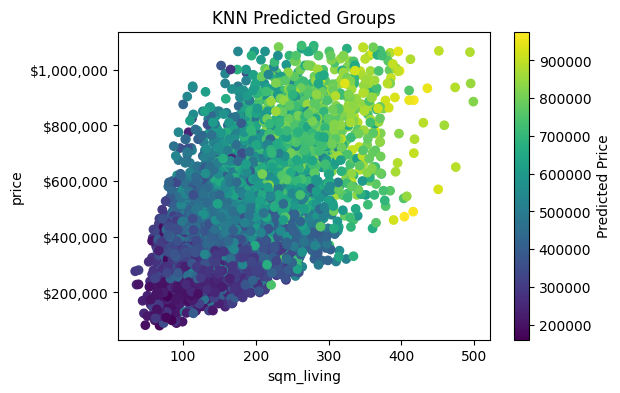

In [16]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(x=x_test[:, 0], y=y_test, c=y_knn_pred, cmap='viridis')
plt.title('KNN Predicted Groups')
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Price')
plt.show()


#### 3D data

In [17]:
import plotly.express as px
fig = px.scatter_3d(df, x='sqm_living', y='city_encoded', z='grade',
              color='price')
fig.show()

#### Linear Regression

In [25]:
X = df[['sqm_living']]
y = df['price']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  150244.33413109003
Coefficients:


[('sqm_living', 1780.2834253718784)]

In [28]:
y_pred = mlr.predict(x_test)
y_train_pred = mlr.predict(x_train)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

163369.74117962254


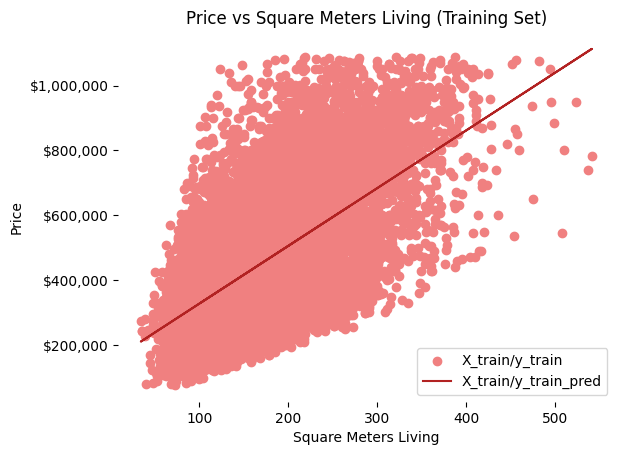

In [29]:
plt.scatter(x_train, y_train, color = 'lightcoral')
plt.plot(x_train, y_train_pred, color = 'firebrick')
plt.title('Price vs Square Meters Living (Training Set)')
plt.xlabel('Square Meters Living')
plt.ylabel('Price')
plt.legend(['X_train/y_train', 'X_train/y_train_pred'], loc='best', facecolor='white')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.box(False)
plt.show()

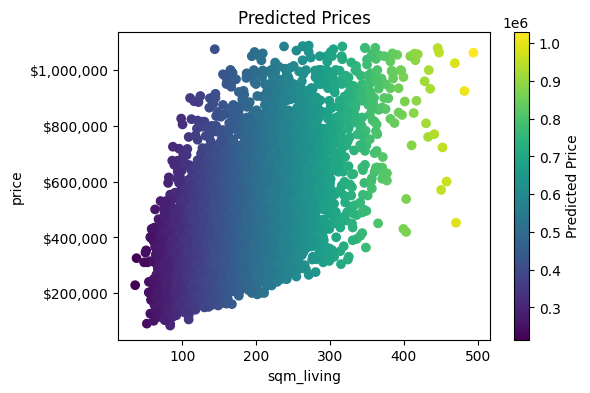

In [30]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(x=x_test, y=y_test, c=y_pred, cmap='viridis')
plt.title('Predicted Prices')
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Price')
plt.show()